In [1]:
import rasterio
import numpy as np

# Function to crop or pad rasters to a fixed shape
def crop_to_fixed_shape(raster_paths, target_shape=(2714, 4023)):
    target_height, target_width = target_shape
    cropped_rasters = []
    
    for path in raster_paths:
        with rasterio.open(path) as src:
            data = src.read(1)  # Read the first band
            
            # Check current shape
            current_shape = data.shape
            print(f"Current shape of {path}: {current_shape}")

            # Initialize an array filled with NaN
            cropped_data = np.full(target_shape, np.nan)  # Fill with NaN
            
            # Crop or pad the raster to the target shape
            min_height = min(current_shape[0], target_height)
            min_width = min(current_shape[1], target_width)
            
            # Copy existing data to the cropped_data
            cropped_data[:min_height, :min_width] = data[:min_height, :min_width]

            cropped_rasters.append(cropped_data)
    
    return cropped_rasters

# Function to calculate year-over-year changes for a given time series of rasters
def calculate_yearly_changes(rasters):
    changes = []
    for i in range(1, len(rasters)):
        change = rasters[i] - rasters[i-1]
        changes.append(change)
    return changes

# Function to analyze and correlate NDVI changes with temperature and rainfall changes
def analyze_time_series_impact(ndvi_changes, temp_changes, rainfall_changes):
    for i in range(len(ndvi_changes)):
        print(f"Year-over-year NDVI change {i}: {np.mean(ndvi_changes[i])}")
        print(f"Year-over-year Temperature change {i}: {np.mean(temp_changes[i])}")
        print(f"Year-over-year Rainfall change {i}: {np.mean(rainfall_changes[i])}")
        
    return np.mean(ndvi_changes, axis=0), np.mean(temp_changes, axis=0), np.mean(rainfall_changes, axis=0)

# Function to save raster data to a GeoTIFF file
def save_raster(data, filename, reference_path):
    with rasterio.open(reference_path) as src:
        profile = src.profile
        profile.update({
            'height': data.shape[0],
            'width': data.shape[1],
            'dtype': 'float32',  # Change the dtype if necessary
            'count': 1  # Only one band
        })
        
        with rasterio.open(filename, 'w', **profile) as dst:
            dst.write(data, 1)

# NDVI raster file paths
ndvi_paths = [
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2021.tif",
   r"C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2022.tif",
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2023.tif",
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2024.tif"
]

# Temperature and rainfall raster paths should be defined similarly
temp_paths = [
     r"C:\Users\Lenovo\Downloads\ndvi_change_detection\v_temp_2021_avg.tif",
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\v_temp_2022_avg.tif",
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\v_temp_2023_avg.tif",
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\v_temp_2024_avg.tif"
]

rainfall_paths = [
     r"C:\Users\Lenovo\Downloads\ndvi_change_detection\rain_2021.tif",
     r"C:\Users\Lenovo\Downloads\ndvi_change_detection\rain_2022.tif",
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\rain_2023.tif",
     r"C:\Users\Lenovo\Downloads\ndvi_change_detection\rain_2024.tif"
]

# Crop NDVI, temperature, and rainfall rasters to the fixed shape
ndvi_rasters = crop_to_fixed_shape(ndvi_paths)
temp_rasters = crop_to_fixed_shape(temp_paths)
rainfall_rasters = crop_to_fixed_shape(rainfall_paths)

# Calculate year-over-year changes for NDVI, temperature, and rainfall
ndvi_changes = calculate_yearly_changes(ndvi_rasters)
temp_changes = calculate_yearly_changes(temp_rasters)
rainfall_changes = calculate_yearly_changes(rainfall_rasters)

# Analyze the time series impact and calculate average changes
avg_ndvi_change, avg_temp_change, avg_rainfall_change = analyze_time_series_impact(ndvi_changes, temp_changes, rainfall_changes)

# Save the average NDVI, temperature, and rainfall changes as GeoTIFFs
save_raster(avg_ndvi_change, r"C:\Users\Lenovo\Downloads\ndvi_change_detection\average_ndvi_change.tif", ndvi_paths[0])  # Reference to the first NDVI file
save_raster(avg_temp_change, r"C:\Users\Lenovo\Downloads\ndvi_change_detection\average_temp_change.tif", temp_paths[0])  # Reference to the first temp file
save_raster(avg_rainfall_change, r"C:\Users\Lenovo\Downloads\ndvi_change_detection\average_rainfall_change.tif", rainfall_paths[0])  # Reference to the first rainfall file

print("Time series change detection completed and rasters saved.")


Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2021.tif: (2978, 4114)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2022.tif: (2978, 4114)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2023.tif: (2978, 4114)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2024.tif: (3056, 4067)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\v_temp_2021_avg.tif: (2714, 4023)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\v_temp_2022_avg.tif: (2714, 4023)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\v_temp_2023_avg.tif: (2714, 4023)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\v_temp_2024_avg.tif: (2713, 4023)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\rain_2021.tif: (2714, 4024)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\rain_2022.tif: (2714, 4023)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_det

Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2021.tif: (2978, 4114)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2022.tif: (2978, 4114)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2023.tif: (2978, 4114)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2024.tif: (3056, 4067)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\v_temp_2021_avg.tif: (2714, 4023)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\v_temp_2022_avg.tif: (2714, 4023)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\v_temp_2023_avg.tif: (2714, 4023)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\v_temp_2024_avg.tif: (2713, 4023)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\rain_2021.tif: (2714, 4024)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\rain_2022.tif: (2714, 4023)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_det

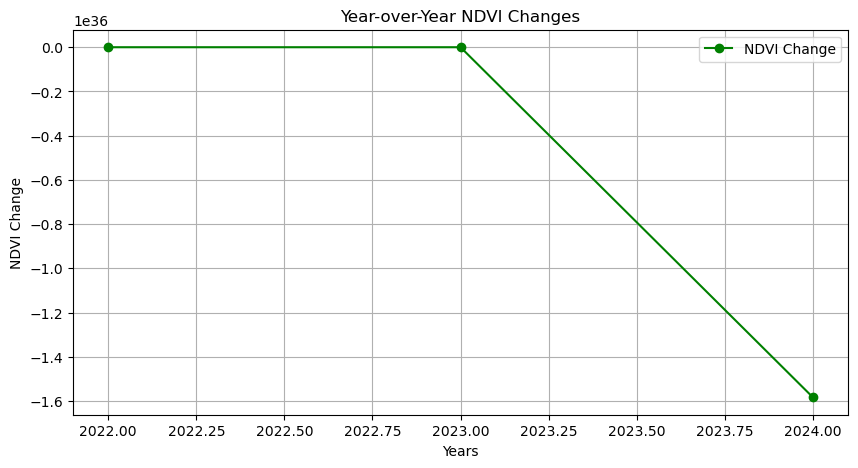

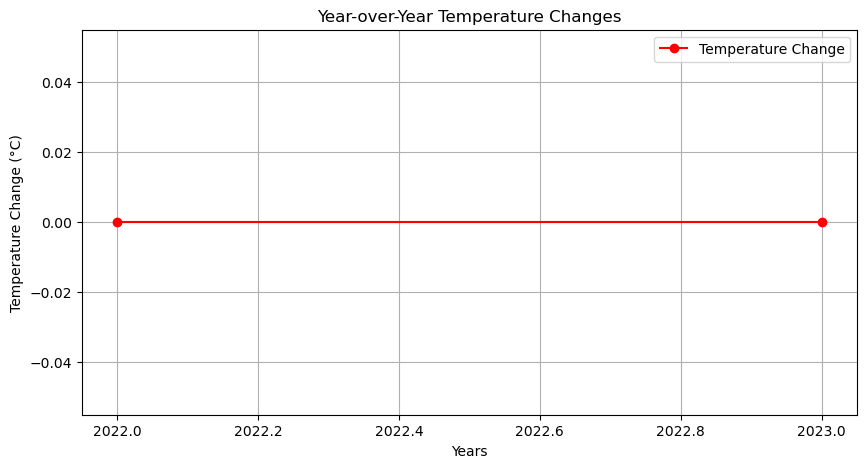

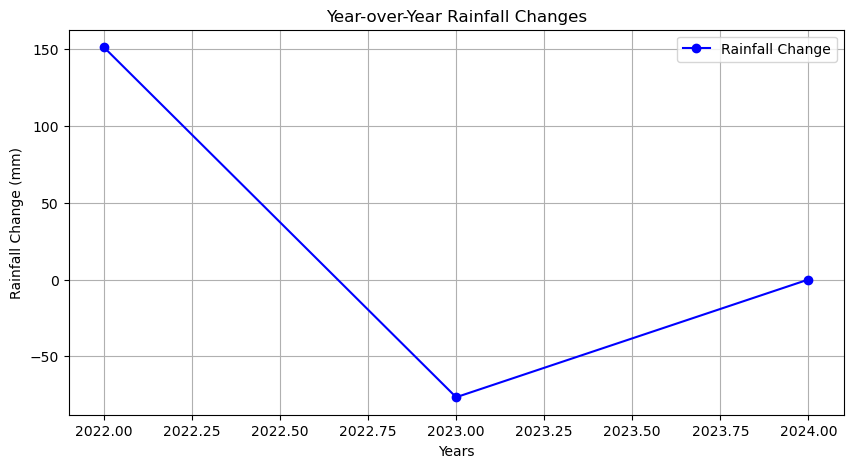

Time series change detection completed, graphs generated, and rasters saved.


In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Function to crop or pad rasters to a fixed shape
def crop_to_fixed_shape(raster_paths, target_shape=(2714, 4023)):
    target_height, target_width = target_shape
    cropped_rasters = []
    
    for path in raster_paths:
        with rasterio.open(path) as src:
            data = src.read(1)  # Read the first band
            
            # Check current shape
            current_shape = data.shape
            print(f"Current shape of {path}: {current_shape}")

            # Initialize an array filled with NaN
            cropped_data = np.full(target_shape, np.nan)  # Fill with NaN
            
            # Crop or pad the raster to the target shape
            min_height = min(current_shape[0], target_height)
            min_width = min(current_shape[1], target_width)
            
            # Copy existing data to the cropped_data
            cropped_data[:min_height, :min_width] = data[:min_height, :min_width]

            cropped_rasters.append(cropped_data)
    
    return cropped_rasters

# Function to calculate year-over-year changes for a given time series of rasters
def calculate_yearly_changes(rasters):
    changes = []
    for i in range(1, len(rasters)):
        change = rasters[i] - rasters[i-1]
        changes.append(change)
    return changes

# Function to analyze and correlate NDVI changes with temperature and rainfall changes
def analyze_time_series_impact(ndvi_changes, temp_changes, rainfall_changes):
    for i in range(len(ndvi_changes)):
        print(f"Year-over-year NDVI change {i}: {np.mean(ndvi_changes[i])}")
        print(f"Year-over-year Temperature change {i}: {np.mean(temp_changes[i])}")
        print(f"Year-over-year Rainfall change {i}: {np.mean(rainfall_changes[i])}")
        
    return np.mean(ndvi_changes, axis=0), np.mean(temp_changes, axis=0), np.mean(rainfall_changes, axis=0)

# Function to save raster data to a GeoTIFF file
def save_raster(data, filename, reference_path):
    with rasterio.open(reference_path) as src:
        profile = src.profile
        profile.update({
            'height': data.shape[0],
            'width': data.shape[1],
            'dtype': 'float32',  # Change the dtype if necessary
            'count': 1  # Only one band
        })
        
        with rasterio.open(filename, 'w', **profile) as dst:
            dst.write(data, 1)

# Function to plot changes for NDVI, temperature, and rainfall
def plot_changes(years, ndvi_changes, temp_changes, rainfall_changes):
    # Plot NDVI Changes
    plt.figure(figsize=(10, 5))
    plt.plot(years[1:], [np.mean(change) for change in ndvi_changes], label='NDVI Change', color='green', marker='o')
    plt.xlabel('Years')
    plt.ylabel('NDVI Change')
    plt.title('Year-over-Year NDVI Changes')
    plt.grid(True)
    plt.legend()
    #plt.savefig('ndvi_changes_plot.png')
    plt.show()

    # Plot Temperature Changes
    plt.figure(figsize=(10, 5))
    plt.plot(years[1:], [np.mean(change) for change in temp_changes], label='Temperature Change', color='red', marker='o')
    plt.xlabel('Years')
    plt.ylabel('Temperature Change (°C)')
    plt.title('Year-over-Year Temperature Changes')
    plt.grid(True)
    plt.legend()
    #plt.savefig('temp_changes_plot.png')
    plt.show()

    # Plot Rainfall Changes
    plt.figure(figsize=(10, 5))
    plt.plot(years[1:], [np.mean(change) for change in rainfall_changes], label='Rainfall Change', color='blue', marker='o')
    plt.xlabel('Years')
    plt.ylabel('Rainfall Change (mm)')
    plt.title('Year-over-Year Rainfall Changes')
    plt.grid(True)
    plt.legend()
    #plt.savefig('rainfall_changes_plot.png')
    plt.show()

# NDVI raster file paths
ndvi_paths = [
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2021.tif",
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2022.tif",
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2023.tif",
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2024.tif"
]

# Temperature and rainfall raster paths should be defined similarly
temp_paths = [
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\v_temp_2021_avg.tif",
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\v_temp_2022_avg.tif",
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\v_temp_2023_avg.tif",
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\v_temp_2024_avg.tif"
]

rainfall_paths = [
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\rain_2021.tif",
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\rain_2022.tif",
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\rain_2023.tif",
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\rain_2024.tif"
]

# Crop NDVI, temperature, and rainfall rasters to the fixed shape
ndvi_rasters = crop_to_fixed_shape(ndvi_paths)
temp_rasters = crop_to_fixed_shape(temp_paths)
rainfall_rasters = crop_to_fixed_shape(rainfall_paths)

# Calculate year-over-year changes for NDVI, temperature, and rainfall
ndvi_changes = calculate_yearly_changes(ndvi_rasters)
temp_changes = calculate_yearly_changes(temp_rasters)
rainfall_changes = calculate_yearly_changes(rainfall_rasters)

# Analyze the time series impact and calculate average changes
avg_ndvi_change, avg_temp_change, avg_rainfall_change = analyze_time_series_impact(ndvi_changes, temp_changes, rainfall_changes)

# Save the average NDVI, temperature, and rainfall changes as GeoTIFFs
save_raster(avg_ndvi_change, r"C:\Users\Lenovo\Downloads\ndvi_change_detection\average_ndvi_change1.tif", ndvi_paths[0])
save_raster(avg_temp_change, r"C:\Users\Lenovo\Downloads\ndvi_change_detection\average_temp_change1.tif", temp_paths[0])
save_raster(avg_rainfall_change, r"C:\Users\Lenovo\Downloads\ndvi_change_detection\average_rainfall_change1.tif", rainfall_paths[0])

# Plot the year-over-year changes
years = [2021, 2022, 2023, 2024]
plot_changes(years, ndvi_changes, temp_changes, rainfall_changes)

print("Time series change detection completed, graphs generated, and rasters saved.")


Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2021.tif: (2978, 4114)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2022.tif: (2978, 4114)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2023.tif: (2978, 4114)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2024.tif: (3056, 4067)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\rain_2021.tif: (2714, 4024)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\rain_2022.tif: (2714, 4023)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\rain_2023.tif: (2714, 4023)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\rain_2024.tif: (2714, 4023)
Year-over-year NDVI Z-score change 0: 3.606483294216823e-41
Year-over-year Rainfall Z-score change 0: 0.3032092924970908
Year-over-year NDVI Z-score change 1: 1.261328649831221e-41
Year-over-year Rainfall Z-score change 1: -0.18393758600881566
Year-over-year NDVI Z-sc

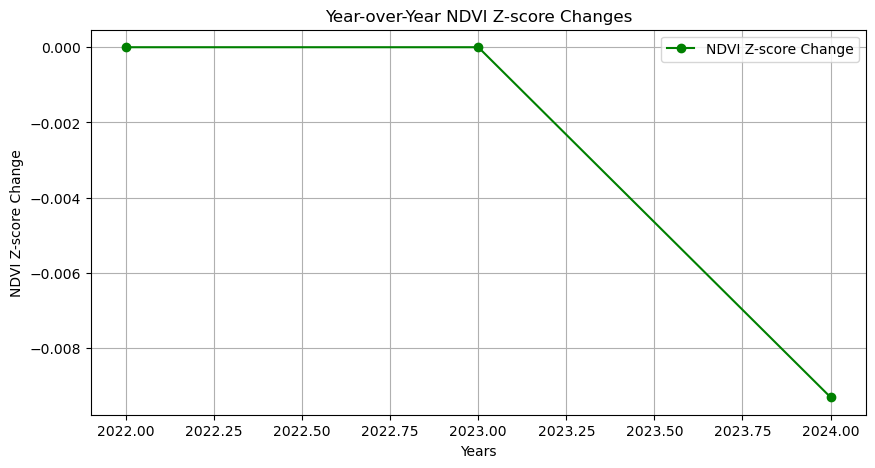

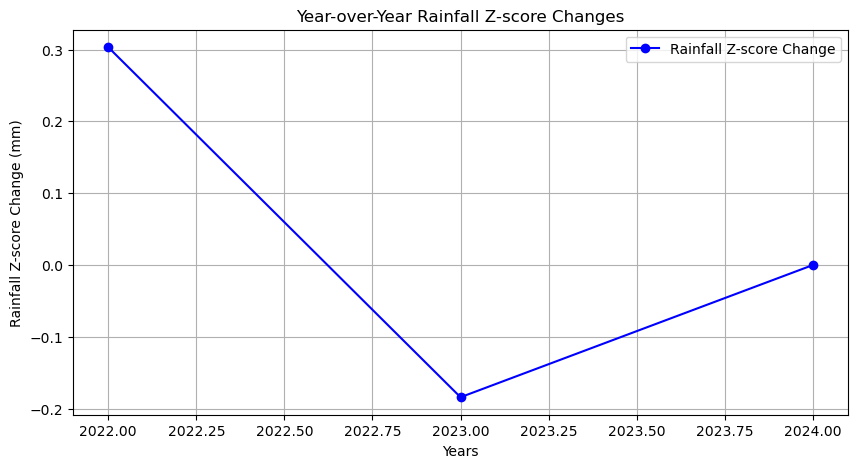

Time series change detection completed using Z-score method, graphs generated, and rasters saved.


In [7]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Function to crop or pad rasters to a fixed shape
def crop_to_fixed_shape(raster_paths, target_shape=(2714, 4023)):
    target_height, target_width = target_shape
    cropped_rasters = []
    
    for path in raster_paths:
        with rasterio.open(path) as src:
            data = src.read(1)  # Read the first band
            
            # Check current shape
            current_shape = data.shape
            print(f"Current shape of {path}: {current_shape}")

            # Initialize an array filled with NaN
            cropped_data = np.full(target_shape, np.nan)  # Fill with NaN
            
            # Crop or pad the raster to the target shape
            min_height = min(current_shape[0], target_height)
            min_width = min(current_shape[1], target_width)
            
            # Copy existing data to the cropped_data
            cropped_data[:min_height, :min_width] = data[:min_height, :min_width]

            cropped_rasters.append(cropped_data)
    
    return cropped_rasters

# Z-score calculation for robust change detection
def calculate_z_score_change(current, previous):
    mean_current = np.mean(current)
    std_current = np.std(current)
    z_score_change = (current - previous) / std_current  # Z-score change
    return z_score_change

# Function to calculate year-over-year changes using Z-score
def calculate_yearly_changes_zscore(rasters):
    changes = []
    for i in range(1, len(rasters)):
        change = calculate_z_score_change(rasters[i], rasters[i-1])
        changes.append(change)
    return changes

# Function to analyze and correlate NDVI changes with rainfall changes using Z-score method
def analyze_time_series_impact(ndvi_changes, rainfall_changes):
    for i in range(len(ndvi_changes)):
        print(f"Year-over-year NDVI Z-score change {i}: {np.mean(ndvi_changes[i])}")
        print(f"Year-over-year Rainfall Z-score change {i}: {np.mean(rainfall_changes[i])}")
        
    return np.mean(ndvi_changes, axis=0), np.mean(rainfall_changes, axis=0)

# Function to save raster data to a GeoTIFF file
def save_raster(data, filename, reference_path):
    with rasterio.open(reference_path) as src:
        profile = src.profile
        profile.update({
            'height': data.shape[0],
            'width': data.shape[1],
            'dtype': 'float32',  # Change the dtype if necessary
            'count': 1  # Only one band
        })
        
        with rasterio.open(filename, 'w', **profile) as dst:
            dst.write(data, 1)

# Function to plot changes for NDVI and rainfall
def plot_changes(years, ndvi_changes, rainfall_changes):
    # Plot NDVI Changes
    plt.figure(figsize=(10, 5))
    plt.plot(years[1:], [np.mean(change) for change in ndvi_changes], label='NDVI Z-score Change', color='green', marker='o')
    plt.xlabel('Years')
    plt.ylabel('NDVI Z-score Change')
    plt.title('Year-over-Year NDVI Z-score Changes')
    plt.grid(True)
    plt.legend()
    #plt.savefig('ndvi_changes_plot.png')
    plt.show()

    # Plot Rainfall Changes
    plt.figure(figsize=(10, 5))
    plt.plot(years[1:], [np.mean(change) for change in rainfall_changes], label='Rainfall Z-score Change', color='blue', marker='o')
    plt.xlabel('Years')
    plt.ylabel('Rainfall Z-score Change (mm)')
    plt.title('Year-over-Year Rainfall Z-score Changes')
    plt.grid(True)
    plt.legend()
    #plt.savefig('rainfall_changes_plot.png')
    plt.show()

# NDVI raster file paths
ndvi_paths = [
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2021.tif",
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2022.tif",
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2023.tif",
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2024.tif"
]

# Rainfall raster paths
rainfall_paths = [
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\rain_2021.tif",
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\rain_2022.tif",
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\rain_2023.tif",
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\rain_2024.tif"
]

# Crop NDVI and rainfall rasters to the fixed shape
ndvi_rasters = crop_to_fixed_shape(ndvi_paths)
rainfall_rasters = crop_to_fixed_shape(rainfall_paths)

# Calculate year-over-year changes for NDVI and rainfall using Z-score method
ndvi_changes = calculate_yearly_changes_zscore(ndvi_rasters)
rainfall_changes = calculate_yearly_changes_zscore(rainfall_rasters)

# Analyze the time series impact and calculate average Z-score changes
avg_ndvi_change, avg_rainfall_change = analyze_time_series_impact(ndvi_changes, rainfall_changes)

# Save the average NDVI and rainfall Z-score changes as GeoTIFFs
save_raster(avg_ndvi_change, r"C:\Users\Lenovo\Downloads\ndvi_change_detection\average_ndvi_change_zscore.tif", ndvi_paths[0])
save_raster(avg_rainfall_change, r"C:\Users\Lenovo\Downloads\ndvi_change_detection\average_rainfall_change_zscore.tif", rainfall_paths[0])

# Plot the year-over-year changes
years = [2021, 2022, 2023, 2024]
plot_changes(years, ndvi_changes, rainfall_changes)

print("Time series change detection completed using Z-score method, graphs generated, and rasters saved.")


Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2021.tif: (2978, 4114)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2022.tif: (2978, 4114)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2023.tif: (2978, 4114)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2024.tif: (3056, 4067)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\rain_2021.tif: (2714, 4024)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\rain_2022.tif: (2714, 4023)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\rain_2023.tif: (2714, 4023)
Current shape of C:\Users\Lenovo\Downloads\ndvi_change_detection\rain_2024.tif: (2714, 4023)
Year-over-year NDVI change 0: 0.007945378733303258
Year-over-year NDVI change 1: 0.0019708269761697433
Year-over-year NDVI change 2: -1.5830090861857874e+36


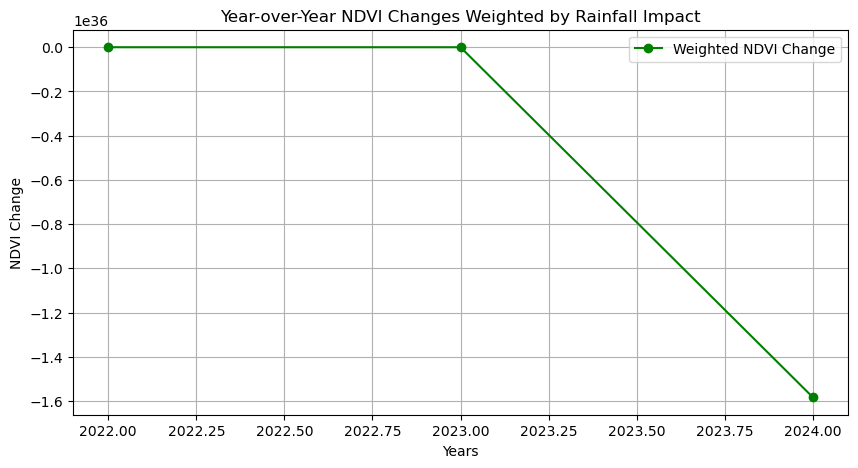

Weighted NDVI change detection completed, graphs generated, and rasters saved.


In [9]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Function to crop or pad rasters to a fixed shape
def crop_to_fixed_shape(raster_paths, target_shape=(2714, 4023)):
    target_height, target_width = target_shape
    cropped_rasters = []
    
    for path in raster_paths:
        with rasterio.open(path) as src:
            data = src.read(1)  # Read the first band
            
            # Check current shape
            current_shape = data.shape
            print(f"Current shape of {path}: {current_shape}")

            # Initialize an array filled with NaN
            cropped_data = np.full(target_shape, np.nan)  # Fill with NaN
            
            # Crop or pad the raster to the target shape
            min_height = min(current_shape[0], target_height)
            min_width = min(current_shape[1], target_width)
            
            # Copy existing data to the cropped_data
            cropped_data[:min_height, :min_width] = data[:min_height, :min_width]

            cropped_rasters.append(cropped_data)
    
    return cropped_rasters

# Function to calculate year-over-year NDVI changes weighted by rainfall impact
# Function to calculate year-over-year NDVI changes weighted by rainfall impact
def calculate_weighted_changes(ndvi_rasters, rainfall_rasters, threshold=0.1, epsilon=1e-6):
    weighted_changes = []
    
    for i in range(1, len(ndvi_rasters)):
        ndvi_change = ndvi_rasters[i] - ndvi_rasters[i-1]
        rainfall_change = rainfall_rasters[i] - rainfall_rasters[i-1]

        # Normalize the rainfall change (avoid division by zero by using epsilon)
        max_rainfall_change = np.max(np.abs(rainfall_change))
        if max_rainfall_change < epsilon:
            rainfall_change_normalized = np.zeros_like(rainfall_change)  # Set to zero if the change is too small
        else:
            rainfall_change_normalized = rainfall_change / max_rainfall_change
        
        # Apply the threshold to filter significant rainfall changes
        rainfall_impact = np.where(np.abs(rainfall_change_normalized) > threshold, rainfall_change_normalized, 0)
        
        # Calculate the weighted NDVI change (adjust NDVI change by rainfall impact)
        weighted_ndvi_change = ndvi_change * (1 + rainfall_impact)  # Increase NDVI change where rainfall impact is high
        
        weighted_changes.append(weighted_ndvi_change)
    
    return weighted_changes


# Function to analyze the weighted NDVI changes
def analyze_weighted_changes(ndvi_changes):
    for i in range(len(ndvi_changes)):
        print(f"Year-over-year NDVI change {i}: {np.mean(ndvi_changes[i])}")
    
    return np.mean(ndvi_changes, axis=0)

# Function to save raster data to a GeoTIFF file
def save_raster(data, filename, reference_path):
    with rasterio.open(reference_path) as src:
        profile = src.profile
        profile.update({
            'height': data.shape[0],
            'width': data.shape[1],
            'dtype': 'float32',  # Change the dtype if necessary
            'count': 1  # Only one band
        })
        
        with rasterio.open(filename, 'w', **profile) as dst:
            dst.write(data, 1)

# Function to plot weighted NDVI changes over the years
def plot_weighted_changes(years, weighted_ndvi_changes):
    # Plot NDVI Changes
    plt.figure(figsize=(10, 5))
    plt.plot(years[1:], [np.mean(change) for change in weighted_ndvi_changes], label='Weighted NDVI Change', color='green', marker='o')
    plt.xlabel('Years')
    plt.ylabel('NDVI Change')
    plt.title('Year-over-Year NDVI Changes Weighted by Rainfall Impact')
    plt.grid(True)
    plt.legend()
    plt.show()

# NDVI and rainfall raster file paths
ndvi_paths = [
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2021.tif",
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2022.tif",
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2023.tif",
    r"C:\Users\Lenovo\Downloads\ndvi_change_detection\c_2024.tif"
]


# Crop NDVI and rainfall rasters to the fixed shape
ndvi_rasters = crop_to_fixed_shape(ndvi_paths)
rainfall_rasters = crop_to_fixed_shape(rainfall_paths)

# Calculate year-over-year NDVI changes weighted by rainfall
weighted_ndvi_changes = calculate_weighted_changes(ndvi_rasters, rainfall_rasters)

# Analyze the time series impact and calculate average weighted NDVI change
avg_weighted_ndvi_change = analyze_weighted_changes(weighted_ndvi_changes)

# Save the average weighted NDVI change as a GeoTIFF
save_raster(avg_weighted_ndvi_change, r"C:\Users\Lenovo\Downloads\ndvi_change_detection\avg_weighted_ndvi_change11.tif", ndvi_paths[0])

# Plot the year-over-year weighted NDVI changes
years = [2021, 2022, 2023, 2024]
plot_weighted_changes(years, weighted_ndvi_changes)

print("Weighted NDVI change detection completed, graphs generated, and rasters saved.")
